Rf_max = 5.784014418128498
Rf_min = 2.2619721165033715
Wm_max = 0.9291177638002779
Wm_min = 0.4345474153963904
ΔA_max = 0.8631057493946894
ΔA_min = 0.06068791958737041
Rf_mode = 4.427566923874535
Wm_mode = 0.6319862170067982
Rf_mean = 3.4307695918565027
Wm_mean = 0.7223845697633249
ΔA_mean = 0.3328354513895015


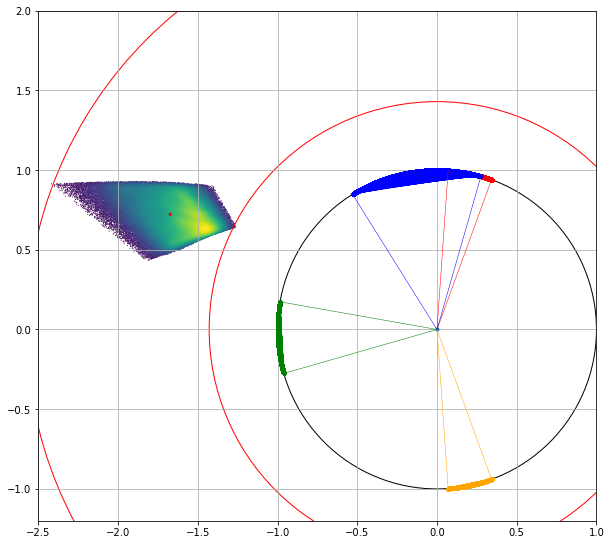

In [4]:
import sympy as sp
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from scipy import optimize as opt
from scipy import interpolate
from scipy.stats import gaussian_kde
from numpy.random import*


def apploximate(value):
    return eval(str(value))

#Uniform distribution

#Enter the angle range of La1, La2, Lb1, and Lb2 measured counterclockwise from Foliation.
La1_min = 30
La1_max = 30

La2_min = 100
La2_max = 116

Lb1_min = 12
Lb1_max = 28

Lb2_min = 155
Lb2_max = 160

#Use to check the range of the distortion (shown as a red arc on the diagram).
Rf_min = 2.27
Rf_max = 5.66

#Set the number of attempts. Please enter a small value such as N=100 for operation check.
#For analysis, a larger number such as N=100000 is required. 
#Depending on the operating environment, it may take several minutes to analyze.
N = 10000

#Set the display range of the figure.
x_min = -2.5
x_max = 1

y_min = -1.2
y_max = 2

size = 1

###################################
T1 = (Rf_min + 1)/(Rf_min -1)
T2 = (Rf_max + 1)/(Rf_max -1)

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

MC = ptc.Circle(xy=(0,0),radius=1,ec='#000000',fill=False)
MCO = plt.plot(0,0,marker='.')
#CRf15 = ptc.Circle(xy=(0,0),radius=5,ec='#000000',fill=False,linestyle = ':')
#CRf20 = ptc.Circle(xy=(0,0),radius=3,ec='#000000',fill=False,linestyle = '--')
#CRf25 = ptc.Circle(xy=(0,0),radius=2.33333,ec='#000000',fill=False,linestyle = ':')
#CRf30 = ptc.Circle(xy=(0,0),radius=2,ec='#000000',fill=False,linestyle = '--')
#CRf35 = ptc.Circle(xy=(0,0),radius=1.8,ec='#000000',fill=False,linestyle = ':')
#CRf40 = ptc.Circle(xy=(0,0),radius=1.66666,ec='#000000',fill=False,linestyle = '--')
#CRf45 = ptc.Circle(xy=(0,0),radius=1.57143,ec='#000000',fill=False,linestyle = ':')
#CRf50 = ptc.Circle(xy=(0,0),radius=1.5,ec='#000000',fill=False,linestyle = '--')
#CRf55 = ptc.Circle(xy=(0,0),radius=1.44444,ec='#000000',fill=False,linestyle = ':')
#CRf60 = ptc.Circle(xy=(0,0),radius=1.4,ec='#000000',fill=False,linestyle = '--')

CT1 = ptc.Circle(xy=(0,0),radius=T1,ec='red',fill=False)
CT2 = ptc.Circle(xy=(0,0),radius=T2,ec='red',fill=False)

ax.add_patch(MC)
#ax.add_patch(CRf15)
#ax.add_patch(CRf20)
#ax.add_patch(CRf25)
#ax.add_patch(CRf30)
#ax.add_patch(CRf35)
#ax.add_patch(CRf40)
#ax.add_patch(CRf45)
#ax.add_patch(CRf50)
#ax.add_patch(CRf55)
#ax.add_patch(CRf60)
ax.add_patch(CT1)
ax.add_patch(CT2)

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
#plt.axis('scaled')
plt.grid()
ax.set_aspect('equal')



xarray = []
yarray = []
La1_xarray = []
La1_yarray = []
La2_xarray = []
La2_yarray = []
Lb1_xarray = []
Lb1_yarray = []
Lb2_xarray = []
Lb2_yarray = []
Aarray = []
Area_array = []
Rf_array = []

for i in range(N):
    f_La1 = rand()*(La1_max-La1_min)+La1_min
    f_La2 = rand()*(La2_max-La2_min)+La2_min
    f_Lb1 = rand()*(Lb1_max-Lb1_min)+Lb1_min
    f_Lb2 = rand()*(Lb2_max-Lb2_min)+Lb2_min
        
    La1La2 = f_La2 - f_La1
    La1Lb1 = f_La1 - f_Lb1
    Lb1Lb2 = f_Lb1 + (180 - f_Lb2)

    a = math.radians(La1La2)
    b = math.radians(La1Lb1*2)
    c = math.radians(Lb1Lb2*2)
    
    A0 = np.cos(a)

    k = (np.sin(a) - np.sin(a + b + c)) / (np.cos(a) - np.cos(a + b + c))

    l = (-1 * np.sin(a) - np.sin(a + b)) / (np.cos(a) - np.cos(a + b))

    x1 = np.cos(a + b)
    x2 = np.cos(a + b + c)
    y1 = np.sin(a + b)
    y2 = np.sin(a + b + c)


    if b == 0:
        q = - y1

    else:
        q = -(x2 - x1 + k*y2 - l*y1)/(k - l)

    
#CRf15: Rf=1.5, CRf20: Rf=2.0 ....の時のモール図の原点が乗る円
    lb1_x = np.cos(a + b)
    lb1_y = np.sin(a + b)
    lb2_x = np.cos(a + b + c)
    lb2_y = np.sin(a + b + c)
    

    la1_x = np.cos(a)
    la1_y = np.sin(a)
    la2_x = np.cos(a)
    la2_y = -np.sin(a)
    
   
    if b == 0:
        x0 = lb2_x + k*(lb2_y - lb1_y)
        y0 = b1_y
    else:
        x0 = k*l*(-lb2_x/k + lb1_x/l - lb2_y + lb1_y)/(k-l)
        y0 = (lb2_x - lb1_x + k*lb2_y - l*lb1_y)/(k-l)
        
    Ta = (x0**2 + y0**2)**(1/2)
    Rf = (Ta + 1)/(Ta - 1)    
    Wm = q

    R = sp.Symbol('R')
    Tb = sp.Symbol('Tb')
   
    if Wm == 1:
        def opt_ntrs(self):
            def EQ_A(R):
                Tb = R*(Rf + 1)/(Rf - 1)
                M = (Tb**2 - R**2)**(1/2)
                return M*math.log(M)/R - np.cos(a)
            return opt.newton(EQ_A, 0.001)
    
    else:
        def opt_ntrs(self):
            def EQ_A(R):
                Tb = R*(Rf + 1)/(Rf - 1)
                M = (Tb**2 - (Wm*R)**2)**(1/2)
                N = (R**2 - (Wm*R)**2)**(1/2)
                return N*(math.log(M + N) + math.log(M - N))/(R*(math.log(M + N) - math.log(M - N))) - np.cos(a)
            return opt.newton(EQ_A, 0.001)
        R0 = opt_ntrs(R)
        T0 = R0*(Rf + 1)/(Rf - 1)

    Area0 = T0**2 - R0**2 - 1
    
    xarray.append(x0)
    yarray.append(y0)
    La1_xarray.append(la1_x)
    La1_yarray.append(la1_y)
    La2_xarray.append(la2_x)
    La2_yarray.append(la2_y)
    Lb1_xarray.append(lb1_x)
    Lb1_yarray.append(lb1_y)
    Lb2_xarray.append(lb2_x)
    Lb2_yarray.append(lb2_y)
    Aarray.append(A0)
    Area_array.append(Area0)
    Rf_array.append(Rf)

x = np.array(xarray)
y = np.array(yarray)
la1_x0 = np.array(La1_xarray)
la1_y0 = np.array(La1_yarray)
la2_x0 = np.array(La2_xarray)
la2_y0 = np.array(La2_yarray)
lb1_x0 = np.array(Lb1_xarray)
lb1_y0 = np.array(Lb1_yarray)
lb2_x0 = np.array(Lb2_xarray)
lb2_y0 = np.array(Lb2_yarray)
A = np.array(Aarray)
Area = np.array(Area_array)
Rf0 = np.array(Rf_array)

Area_max = np.max(Area)
Area_min = np.min(Area)

Rf_max = np.max(Rf0)
Rf_min = np.min(Rf0)

La1 = plt.plot(la1_x0,la1_y0,marker='o',c='red',ms=3)
La2 = plt.plot(la2_x0,la2_y0,marker='o',c='orange',ms=3)
Lb1 = plt.plot(lb1_x0,lb1_y0,marker='o',c='blue',ms=3)
Lb2 = plt.plot(lb2_x0,lb2_y0,marker='o',c='green',ms=3)

a_min = math.radians(La2_min - La1_max)
a_max = math.radians(La2_max - La1_min)
ab_min = math.radians(La2_min + La1_max - Lb1_max*2)
ab_max = math.radians(La2_max + La1_min - Lb1_min*2)
abc_min = math.radians(La2_min + La1_max - Lb2_max*2)
abc_max = math.radians(La2_max + La1_min - Lb2_min*2)


ax.plot([0,np.cos(a_min)],[0,np.sin(a_min)],'red',lw=0.5)
ax.plot([0,np.cos(a_max)],[0,np.sin(a_max)],'red',lw=0.5)
ax.plot([0,np.cos(a_min)],[0,-np.sin(a_min)],'orange',lw=0.5)
ax.plot([0,np.cos(a_max)],[0,-np.sin(a_max)],'orange',lw=0.5)
ax.plot([0,np.cos(ab_min)],[0,np.sin(ab_min)],'blue',lw=0.5)
ax.plot([0,np.cos(ab_max)],[0,np.sin(ab_max)],'blue',lw=0.5)
ax.plot([0,np.cos(abc_min)],[0,np.sin(abc_min)],'green',lw=0.5)
ax.plot([0,np.cos(abc_max)],[0,np.sin(abc_max)],'green',lw=0.5)

xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)

idx = z.argsort()

x, y, z = x[idx], y[idx], z[idx]

Wm_max = np.max(y)
Wm_min = np.min(y)

print('Rf_max =',Rf_max)
print('Rf_min =',Rf_min)
print('Wm_max =',Wm_max)
print('Wm_min =',Wm_min)
print('ΔA_max =',Area_max)
print('ΔA_min =',Area_min)

x_mode = x[N-1]
y_mode = y[N-1]

T_mode = (x_mode**2 + y_mode**2)**(1/2)
Rf_mode = (T_mode + 1)/(T_mode - 1)
Wm_mode = y_mode
print('Rf_mode =',Rf_mode)
print('Wm_mode =',Wm_mode)

x_mean = np.mean(x)
y_mean = np.mean(y)
T_mean = (x_mean**2 + y_mean**2)**(1/2)
Rf_mean = (T_mean + 1)/(T_mean - 1)
Wm_mean = y_mean
Area_mean = np.mean(Area)
Rf0_mean = np.mean(Rf0)
print('Rf_mean =',Rf_mean)
print('Wm_mean =',Wm_mean)
print('ΔA_mean =',Area_mean)



plt.scatter(x, y, c=z, marker='o', s=size, edgecolor='')
plt.scatter(x_mean, y_mean, c='red', marker='o', s=10, edgecolor='')



Rf_max = 4.932600771432052
Rf_min = 2.464907360486561
Wm_max = 0.9667789627462835
Wm_min = 0.40054681707281126
ΔA_max = 0.7310860430174773
ΔA_min = 0.00809960509722174
Rf_mean = 3.3285482592664453
Wm_mean = 0.7144768253140438
ΔA_mean = 0.2611376279654909
(-1.7161141811668452, 0.7144768253140438)
(-1.7161141811668452, 0.7144768253140438)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


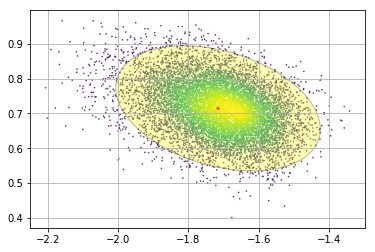

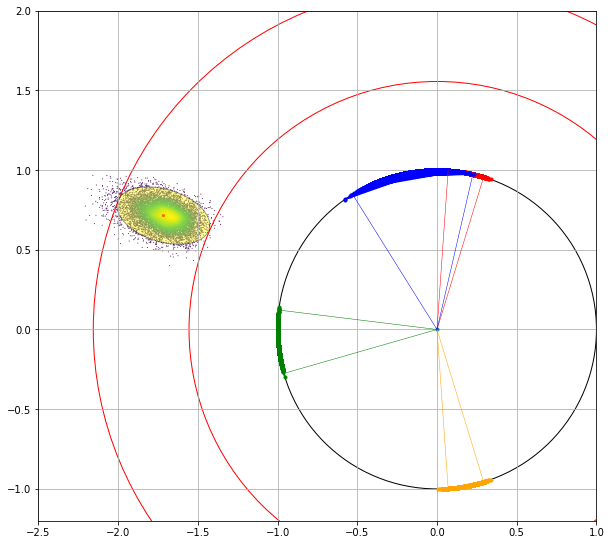

In [3]:
import sympy as sp
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns
from scipy.stats import chi2
from scipy import optimize as opt
from scipy import interpolate
from scipy.stats import gaussian_kde
from scipy import stats
from matplotlib.patches import Ellipse


def apploximate(value):
    return eval(str(value))

#Normal distribution

#Enter the angle range of La1, La2, Lb1, and Lb2 measured counterclockwise from Foliation.
La1_min = 30
La1_max = 30

La2_min = 103
La2_max = 116

Lb1_min = 12
Lb1_max = 28

Lb2_min = 155
Lb2_max = 160

#Use to check the range of the distortion (shown as a red arc on the diagram).
Rf_min = 2.73
Rf_max = 4.6

#Set the number of attempts. Please enter a small value such as N=100 for operation check.
#For analysis, a larger number such as N=100000 is required. 
#Depending on the operating environment, it may take several minutes to analyze.
N = 10000

#Set the display range of the figure.
x_min = -2.5
x_max = 1

y_min = -1.2
y_max = 2

size = 1

###################################
T1 = (Rf_min + 1)/(Rf_min -1)
T2 = (Rf_max + 1)/(Rf_max -1)





xarray = []
yarray = []
La1_xarray = []
La1_yarray = []
La2_xarray = []
La2_yarray = []
Lb1_xarray = []
Lb1_yarray = []
Lb2_xarray = []
Lb2_yarray = []
Aarray = []
Area_array = []
Rf_array = []

for i in range(N):
    f_La1 = random.normalvariate((La1_max+La1_min)/2,(La1_max-La1_min)/5.2)
    f_La2 = random.normalvariate((La2_max+La2_min)/2,(La2_max-La2_min)/5.2)
    f_Lb1 = random.normalvariate((Lb1_max+Lb1_min)/2,(Lb1_max-Lb1_min)/5.2)
    f_Lb2 = random.normalvariate((Lb2_max+Lb2_min)/2,(Lb2_max-Lb2_min)/5.2)
        
    La1La2 = f_La2 - f_La1
    if La1La2 < 0:
        continue
    La1Lb1 = f_La1 - f_Lb1
    if La1Lb1 < 0:
        continue
    Lb1Lb2 = f_Lb1 + (180 - f_Lb2)
    if Lb1Lb2 < 0:
        continue

    a = math.radians(La1La2)
    b = math.radians(La1Lb1*2)
    c = math.radians(Lb1Lb2*2)
    
    A0 = np.cos(a)

    k = (np.sin(a) - np.sin(a + b + c)) / (np.cos(a) - np.cos(a + b + c))

    l = (-1 * np.sin(a) - np.sin(a + b)) / (np.cos(a) - np.cos(a + b))

    x1 = np.cos(a + b)
    x2 = np.cos(a + b + c)
    y1 = np.sin(a + b)
    y2 = np.sin(a + b + c)


    if b == 0:
        q = - y1

    else:
        q = -(x2 - x1 + k*y2 - l*y1)/(k - l)

    
#CRf15: Rf=1.5, CRf20: Rf=2.0 ....の時のモール図の原点が乗る円
    lb1_x = np.cos(a + b)
    lb1_y = np.sin(a + b)
    lb2_x = np.cos(a + b + c)
    lb2_y = np.sin(a + b + c)
    

    la1_x = np.cos(a)
    la1_y = np.sin(a)
    la2_x = np.cos(a)
    la2_y = -np.sin(a)
    
   
    if b == 0:
        x0 = lb2_x + k*(lb2_y - lb1_y)
        y0 = b1_y
    else:
        x0 = k*l*(-lb2_x/k + lb1_x/l - lb2_y + lb1_y)/(k-l)
        y0 = (lb2_x - lb1_x + k*lb2_y - l*lb1_y)/(k-l)
        
    Ta = (x0**2 + y0**2)**(1/2)
    Rf = (Ta + 1)/(Ta - 1)    
    Wm = q

    R = sp.Symbol('R')
    Tb = sp.Symbol('Tb')
   
    if Wm == 1:
        def opt_ntrs(self):
            def EQ_A(R):
                Tb = R*(Rf + 1)/(Rf - 1)
                M = (Tb**2 - R**2)**(1/2)
                return M*math.log(M)/R - np.cos(a)
            return opt.newton(EQ_A, 0.001)
    
    else:
        def opt_ntrs(self):
            def EQ_A(R):
                Tb = R*(Rf + 1)/(Rf - 1)
                M = (Tb**2 - (Wm*R)**2)**(1/2)
                N = (R**2 - (Wm*R)**2)**(1/2)
                return N*(math.log(M + N) + math.log(M - N))/(R*(math.log(M + N) - math.log(M - N))) - np.cos(a)
            return opt.newton(EQ_A, 0.001)
        R0 = opt_ntrs(R)
        T0 = R0*(Rf + 1)/(Rf - 1)

    Area0 = T0**2 - R0**2 - 1
    
    xarray.append(x0)
    yarray.append(y0)
    La1_xarray.append(la1_x)
    La1_yarray.append(la1_y)
    La2_xarray.append(la2_x)
    La2_yarray.append(la2_y)
    Lb1_xarray.append(lb1_x)
    Lb1_yarray.append(lb1_y)
    Lb2_xarray.append(lb2_x)
    Lb2_yarray.append(lb2_y)
    Aarray.append(A0)
    Area_array.append(Area0)
    Rf_array.append(Rf)

x = np.array(xarray)
y = np.array(yarray)
la1_x0 = np.array(La1_xarray)
la1_y0 = np.array(La1_yarray)
la2_x0 = np.array(La2_xarray)
la2_y0 = np.array(La2_yarray)
lb1_x0 = np.array(Lb1_xarray)
lb1_y0 = np.array(Lb1_yarray)
lb2_x0 = np.array(Lb2_xarray)
lb2_y0 = np.array(Lb2_yarray)
A = np.array(Aarray)
Area = np.array(Area_array)
Rf0 = np.array(Rf_array)

Area_max = np.max(Area)
Area_min = np.min(Area)

Rf_max = np.max(Rf0)
Rf_min = np.min(Rf0)


a_min = math.radians(La2_min - La1_max)
a_max = math.radians(La2_max - La1_min)
ab_min = math.radians(La2_min + La1_max - Lb1_max*2)
ab_max = math.radians(La2_max + La1_min - Lb1_min*2)
abc_min = math.radians(La2_min + La1_max - Lb2_max*2)
abc_max = math.radians(La2_max + La1_min - Lb2_min*2)



xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)

idx = z.argsort()

x, y, z = x[idx], y[idx], z[idx]

Wm_max = np.max(y)
Wm_min = np.min(y)

print('Rf_max =',Rf_max)
print('Rf_min =',Rf_min)
print('Wm_max =',Wm_max)
print('Wm_min =',Wm_min)
print('ΔA_max =',Area_max)
print('ΔA_min =',Area_min)

#x_mode = x[N-1]
#y_mode = y[N-1]

#T_mode = (x_mode**2 + y_mode**2)**(1/2)
#Rf_mode = (T_mode + 1)/(T_mode - 1)
#Wm_mode = y_mode
#print('Rf_mode =',Rf_mode)
#print('Wm_mode =',Wm_mode)

x_mean = np.mean(x)
y_mean = np.mean(y)
T_mean = (x_mean**2 + y_mean**2)**(1/2)
Rf_mean = (T_mean + 1)/(T_mean - 1)
Wm_mean = y_mean
Area_mean = np.mean(Area)
Rf0_mean = np.mean(Rf0)
print('Rf_mean =',Rf_mean)
print('Wm_mean =',Wm_mean)
print('ΔA_mean =',Area_mean)


xy_m=(np.mean(x), np.mean(y))
class ConfidenceEllipse:
    def __init__(self, xy, p=0.95):
        self.data = xy
        self.p = p

        self.means = xy_m
        self.cov = np.cov(x, y)
        print(self.means)

        lambdas, vecs = np.linalg.eigh(self.cov)
        order = lambdas.argsort()[::-1]
        lambdas, vecs = lambdas[order], vecs[:,order]

        c = np.sqrt(chi2.ppf(self.p, 2))
        self.w, self.h = 2 * c * np.sqrt(lambdas)
        self.theta = np.degrees(np.arctan(
            ((lambdas[0] - lambdas[1])/self.cov[0,1])))
        
    def get_params(self):
        return self.means, self.w, self.h, self.theta

    def get_patch(self, line_color="black", face_color="none", alpha=0):
        el = Ellipse(xy=self.means,
                     width=self.w, height=self.h,
                     angle=270-self.theta, color=line_color, alpha=alpha)
        el.set_facecolor(face_color)
        return el

def main():

    fig = plt.figure()
    plt.grid()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x, y, c=z, marker=".", s=1)
   # plt.scatter(x_mode, y_mode, c='blue', marker='o', s=10, edgecolor='')
    plt.scatter(x_mean, y_mean, c='red', marker='o', s=10, edgecolor='')

    el = ConfidenceEllipse(xy, p=0.95)
    ax.add_artist(el.get_patch(face_color="yellow", alpha=0.3))
#    plt.savefig("img.png")

if __name__ == "__main__":
    main()

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

MC = ptc.Circle(xy=(0,0),radius=1,ec='#000000',fill=False)
MCO = plt.plot(0,0,marker='.')
#CRf15 = ptc.Circle(xy=(0,0),radius=5,ec='#000000',fill=False,linestyle = ':')
#CRf20 = ptc.Circle(xy=(0,0),radius=3,ec='#000000',fill=False,linestyle = '--')
#CRf25 = ptc.Circle(xy=(0,0),radius=2.33333,ec='#000000',fill=False,linestyle = ':')
#CRf30 = ptc.Circle(xy=(0,0),radius=2,ec='#000000',fill=False,linestyle = '--')
#CRf35 = ptc.Circle(xy=(0,0),radius=1.8,ec='#000000',fill=False,linestyle = ':')
#CRf40 = ptc.Circle(xy=(0,0),radius=1.66666,ec='#000000',fill=False,linestyle = '--')
#CRf45 = ptc.Circle(xy=(0,0),radius=1.57143,ec='#000000',fill=False,linestyle = ':')
#CRf50 = ptc.Circle(xy=(0,0),radius=1.5,ec='#000000',fill=False,linestyle = '--')
#CRf55 = ptc.Circle(xy=(0,0),radius=1.44444,ec='#000000',fill=False,linestyle = ':')
#CRf60 = ptc.Circle(xy=(0,0),radius=1.4,ec='#000000',fill=False,linestyle = '--')

CT1 = ptc.Circle(xy=(0,0),radius=T1,ec='red',fill=False)
CT2 = ptc.Circle(xy=(0,0),radius=T2,ec='red',fill=False)

ax.add_patch(MC)
#ax.add_patch(CRf15)
#ax.add_patch(CRf20)
#ax.add_patch(CRf25)
#ax.add_patch(CRf30)
#ax.add_patch(CRf35)
#ax.add_patch(CRf40)
#ax.add_patch(CRf45)
#ax.add_patch(CRf50)
#ax.add_patch(CRf55)
#ax.add_patch(CRf60)
ax.add_patch(CT1)
ax.add_patch(CT2)

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
#plt.axis('scaled')
plt.grid()
ax.set_aspect('equal')

La1 = plt.plot(la1_x0,la1_y0,marker='o',c='red',ms=3)
La2 = plt.plot(la2_x0,la2_y0,marker='o',c='orange',ms=3)
Lb1 = plt.plot(lb1_x0,lb1_y0,marker='o',c='blue',ms=3)
Lb2 = plt.plot(lb2_x0,lb2_y0,marker='o',c='green',ms=3)

ax.plot([0,np.cos(a_min)],[0,np.sin(a_min)],'red',lw=0.5)
ax.plot([0,np.cos(a_max)],[0,np.sin(a_max)],'red',lw=0.5)
ax.plot([0,np.cos(a_min)],[0,-np.sin(a_min)],'orange',lw=0.5)
ax.plot([0,np.cos(a_max)],[0,-np.sin(a_max)],'orange',lw=0.5)
ax.plot([0,np.cos(ab_min)],[0,np.sin(ab_min)],'blue',lw=0.5)
ax.plot([0,np.cos(ab_max)],[0,np.sin(ab_max)],'blue',lw=0.5)
ax.plot([0,np.cos(abc_min)],[0,np.sin(abc_min)],'green',lw=0.5)
ax.plot([0,np.cos(abc_max)],[0,np.sin(abc_max)],'green',lw=0.5)

el = ConfidenceEllipse(xy, p=0.95)
ax.add_artist(el.get_patch(face_color="yellow", alpha=0.4))


plt.scatter(x, y, c=z, marker='o', s=size, edgecolor='')

plt.scatter(x_mean, y_mean, c='red', marker='o', s=10, edgecolor='')
